# 特徴量スケーリング

## 標準化
- 平均0、分散1にする
- 標準化することでそれぞれの特徴量空間のスケールを合わせることができる

- 勾配や距離を用いたアルゴリズムでは必要
- 正規方程式のような解析的アルゴリズムや決定着などでは不要

## 標準化の式
$$ Z = \frac{x - \bar{x}}{s} $$



In [93]:
import pandas as pd
df = pd.read_csv('sample_data2.csv')

X = df[['space', 'age']]

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


#v平均や標準偏差を計算しインスタンスに保存
scaler.fit(X)
X_scaled = scaler.transform(X)
X0 = X_scaled[:, 0]
X1 = X_scaled[:, 1]
y = df[['rent']]

In [95]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


In [96]:
# 線形回帰
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_scaled, y)

LinearRegression()

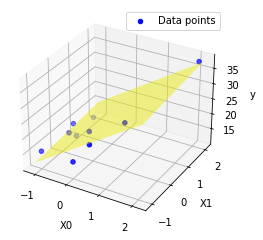

In [97]:
import matplotlib.pyplot as plt
import numpy as np

X0_range = np.arange(X0.min(), X0.max() + 0.1, 0.1)#34
X1_range = np.arange(X1.min(), X1.max() + 0.1, 0.1)#33 
X0_grid, X1_grid = np.meshgrid(X0_range, X1_range)
y_grid = model1.intercept_ + model1.coef_[0, 0] * X0_grid + model1.coef_[0, 1] * X1_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# データポイントのプロット
ax.scatter(X0, X1, y, color='blue', label='Data points')

# 回帰平面のプロット
ax.plot_surface(X0_grid, X1_grid, y_grid, color='yellow', alpha=0.5)

# 軸ラベルの設定
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('y')

plt.legend()
plt.show()

## 正規化
- 値の範囲は０～１
- 外れ値の影響を受けやすい
- 最小の値xminは０に、最大の値xmaxは1になる

## 正規化の式
$$ \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

In [99]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,0.000000,0.090909
1,0.060241,0.545455
2,0.096386,0.772727
3,0.120482,0.409091
4,0.192771,0.227273
5,0.373494,0.000000
6,0.421687,0.181818
7,0.506024,0.045455
8,0.759036,0.181818
9,1.000000,1.000000


In [102]:
model2 = LinearRegression()
model2.fit(X_scaled, y)

LinearRegression()

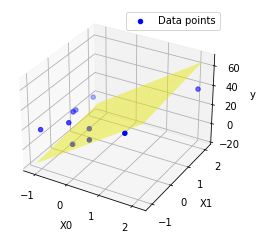

In [103]:
X0_range = np.arange(X0.min(), X0.max() + 0.1, 0.1)#34
X1_range = np.arange(X1.min(), X1.max() + 0.1, 0.1)#33 
X0_grid, X1_grid = np.meshgrid(X0_range, X1_range)
y_grid = model2.intercept_ + model2.coef_[0, 0] * X0_grid + model2.coef_[0, 1] * X1_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# データポイントのプロット
ax.scatter(X0, X1, y, color='blue', label='Data points')

# 回帰平面のプロット
ax.plot_surface(X0_grid, X1_grid, y_grid, color='yellow', alpha=0.5)

# 軸ラベルの設定
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('y')

plt.legend()
plt.show()